<a href="https://colab.research.google.com/github/Ilianaleon0626/Curso_Python_Cucsh/blob/main/Proyecto_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Actividad 2: Proyecto 5. Clasificación de viviendas
Fecha: 27 de octubre de 2025
Curso: Análisis y visualización de datos con Python en la nube
Nombre del alumno: Iliana Guadalupe León González Campus de adscripción: CUCEA

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

# Cargar datos
df = pd.read_csv('/content/drive/MyDrive/Colab Data/viviendas.csv')

# Separar variables predictoras y objetivo
X = df[['Area', 'Room', 'Lon', 'Lat', 'Zip_area', 'Zip_loc']]
y = df[['Price']]

# Codificar variables categóricas
enc = OrdinalEncoder()
enc.fit(X[['Zip_area', 'Zip_loc']])
X_transformed = pd.DataFrame(enc.transform(X[['Zip_area', 'Zip_loc']]), index=X.index)

# Unir variables numéricas con codificadas
X_full = X[['Area', 'Room', 'Lon', 'Lat']].join(X_transformed)

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_full.values, y.values,
    stratify=X['Zip_loc'].values,
    train_size=0.7,
    random_state=1
)


In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Crear y entrenar el modelo
dtree = DecisionTreeClassifier(
    criterion='entropy',
    max_features=3,
    splitter='best',
    max_depth=6,
    min_samples_split=4,
    random_state=3
)
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

# Evaluar el modelo
report = classification_report(y_test, y_pred, output_dict=True)
print("Precisión:", round(report['accuracy'], 3))
print("F1 score:", round(report['macro avg']['f1-score'], 3))


Precisión: 0.895
F1 score: 0.865


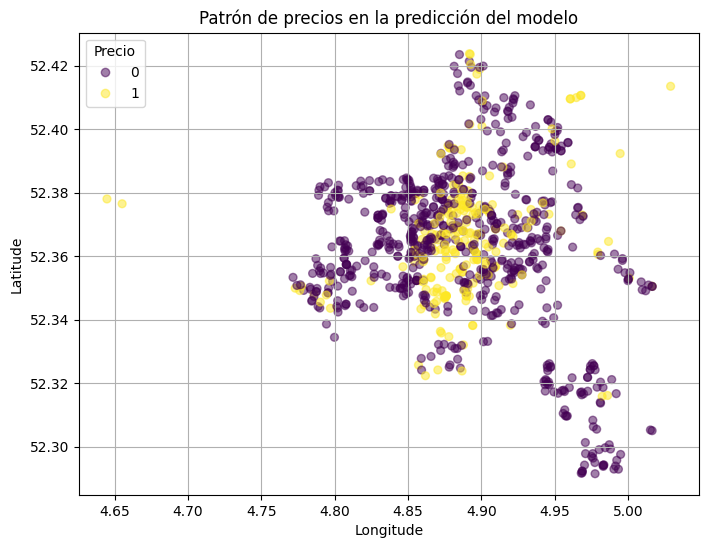

In [4]:
import matplotlib.pyplot as plt

# Predicción completa
y_pred_full = dtree.predict(X_full.values)
levels_predict, categories_predict = pd.factorize(y_pred_full)

# Mapa de predicción
plt.figure(figsize=(8, 6))
scatter_predict = plt.scatter(x='Lon', y='Lat', data=df,
                               c=levels_predict, s=32, alpha=0.5)
plt.title('Patrón de precios en la predicción del modelo')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.legend(scatter_predict.legend_elements()[0], categories_predict, title='Precio')
plt.show()


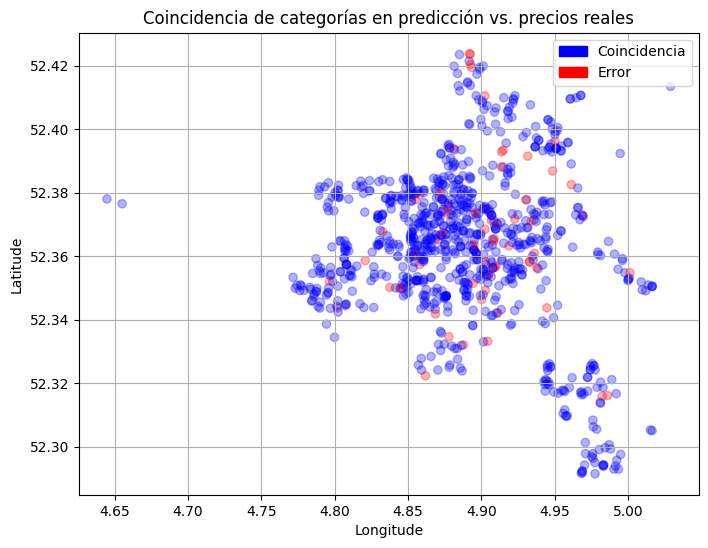

In [5]:
import matplotlib.patches as mpatches

matches = (y_pred_full == y.values.flatten())
colors = ['blue' if m else 'red' for m in matches]

plt.figure(figsize=(8, 6))
plt.scatter(df['Lon'], df['Lat'], c=colors, alpha=0.3)
plt.title('Coincidencia de categorías en predicción vs. precios reales')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)

# Leyenda
blue_patch = mpatches.Patch(color='blue', label='Coincidencia')
red_patch = mpatches.Patch(color='red', label='Error')
plt.legend(handles=[blue_patch, red_patch])
plt.show()
